In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [4]:
tf.executing_eagerly()

True

In [5]:
#making constants

In [7]:
a=tf.constant(2)
b=tf.constant(5)

In [ ]:
a
#A tensor is just an nd array

In [10]:
#numpy is native in tf now
a.numpy()

2

In [11]:
a*b

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [12]:
tf.add(a,b)

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [13]:
tf.divide(a,b)

<tf.Tensor: shape=(), dtype=float64, numpy=0.4>

In [14]:
a+b

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [16]:
ar= np.arange(25).reshape(5,5)

In [18]:
tf.constant(np.arange(25).reshape(5,5),name="mymat")

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])>

In [19]:
a= tf.constant([[1,2],[3,4]])
b= tf.constant([[5,6],[7,8]])

In [20]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]])>

In [23]:
#can't assing value on constant
a.assign(8)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [39]:
var = tf.Variable(3.)

In [40]:
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [41]:
var.assign(4)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=4.0>

In [42]:
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

In [43]:
var.assign_add(1.)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=5.0>

In [44]:
var.numpy()

5.0

In [48]:
# @tf.function is one DAG and then scope make internal DAGs(they can access each other and scope is just for representation of these particular DAGs)
@tf.function
def func(a,b):
    with tf.name_scope('first'):
        z= tf.multiply(a,b,name='z')
    with tf.name_scope('second'):
        y1= tf.constant(3, name='3')
        y2= tf.constant(4)
        w1= tf.add(z,y1,name='w1')
        w2=tf.add(z,y2,name='w2')
    return(w1+w2)

In [49]:
func(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[17, 31],
       [49, 71]])>

In [51]:
from tensorboard import program

In [52]:
w= tf.Variable(3.0)

#Gradient scope for function w^2
# differentiate one thing w.r.t other
with tf.GradientTape() as tape:
    square_w = w * w

grad = tape.gradient(square_w,w)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


In [54]:
for i in range(10):
    with tf.GradientTape() as tape:
        w.assign(i)
        square_w= w*w + 2*w
        grad= tape.gradient(square_w,w)
        print(grad)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(14.0, shape=(), dtype=float32)
tf.Tensor(16.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32)


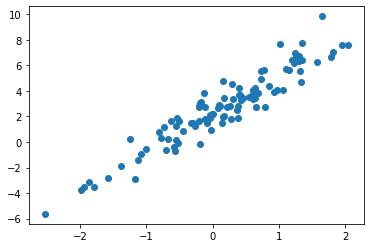

In [55]:
NUM_EXAMPLES=100

X=tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
y= X*3 + 2 + noise

plt.scatter(X,y)

In [57]:
from sklearn.datasets import make_regression

In [59]:
X,y= make_regression(n_features=1,n_samples=100,random_state=42,noise=5)

In [62]:
X=tf.constant(X.flatten())
y= tf.constant(y)

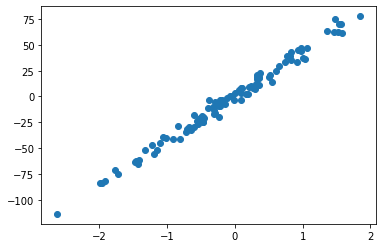

In [63]:
plt.scatter(X,y)

In [64]:
W = tf.Variable(0.)
b= tf.Variable(0.)
learning_rate=0.01
train_steps=300

In [65]:
@tf.function
def train_on_batch(X,y):
    
    with tf.GradientTape() as tape:
    
        yhat= X*W + b

        error = yhat -y
        loss =tf.reduce_mean(error**2)
    dW,db= tape.gradient(loss, [W,b])
    
    W.assign_sub(dW*learning_rate)
    b.assign_sub(db*learning_rate)
    
    return(loss)
    
    